<a href="https://colab.research.google.com/github/taha-koroglu/gumushane_eem_eesec440/blob/main/code/xor_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En başta bu kodda kullanacağımız **fonksiyonları** çağıracağımız **kütüphaneleri** dahil ediyoruz.</br>First we import the **libraries** to use the functions that we are going to invoke in this code.

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np # numerical python kütüphanesi
import pandas as pd
import sys

Bildiğimiz gibi, *XOR* problemi *Elektrik-Elektronik Mühendisliğinde* sayısal devreler (logic circuits) alanında karşımıza çıkan bir problem. **İki girişli ve tek çıkışlı** bir sistemin girişleri *TRUE-FALSE* (veya *1-0* veya *HIGH-LOW*) olarak isimlendirilen *Boolean* veri tipinde değer alıyorlar. Benzer şekilde çıkış da yine *1-0* Boolean değişkenlerinden birisi oluyor.

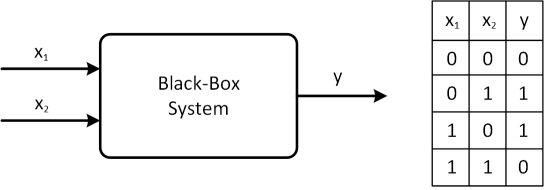

Aşağıda **numpy** kütüphanesi kullanarak **giriş** (input) ve **hedef** (target) değişkenlerini oluşturduk. Dikkat edin, burada hedef değişkenine ingilizce de **annonation** deniyor. Yani bizler hedef değişkenini oluşturduğumuzda giriş verisini **annotate** etmiş oluyoruz.

In [5]:
trainingData = np.array([[0,0], [0,1], [1,0], [1,1]], "float32")
targetData = np.array([[0], [1], [1], [0]], "float32")

Yukarıda ürettiğimiz giriş-çıkış verisini aşağıda konsola yazdıralım.

In [ ]:
print(trainingData)
print(targetData)

**TF** kütüphanesinin içerisinde yer alan **Keras** kütüphanesiyle bir tane çok katmanlı sinir ağı (**multi-layer perceptron** - **MLP**) oluşturalım. Giriş sayısının iki, çıkış sayısının bir olduğunu, gizli katman (hidden layer) sayısını ve bu katmanlardaki nöron sayısını ve de hangi aktivasyon fonksiyonunu kullandığımızı adım adım seçeceğiz.

In [71]:
model = tf.keras.models.Sequential(layers=None, name='xor_MLP')
model.add(tf.keras.layers.Dense(16, input_dim = 2, activation = 'relu', name='HL1'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid', name='outputLayer'))

Yukarıdaki kodda yapay sinir ağımızın yapısını (i.e., katman sayısı, katmanlardaki nöron sayısı, nöron çıkışlarında kullanılan aktivasyon fonskiyon tipleri) belirledik. Bir sonraki adım olarak öğrenme (**learning**) işlemini başlatacağız. Şimdi öğrenme işleminin nasıl olacağını belirleyelim.

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics='binary_accuracy')
model.summary()

Son olarak konfigürasyonunu tamamladığımız çok katmanlı yapay sinir ağının eğitimini başlatıyoruz.

In [ ]:
history=model.fit(trainingData, targetData, epochs=200, verbose=1)

In [ ]:
model.predict(trainingData).round()

In [ ]:
lossCurve = history.history["loss"]
plt.plot(lossCurve, label="Train")
plt.legend(loc='upper right')
plt.title("loss")

In [ ]:
accuracyCurve = history.history["binary_accuracy"]
plt.plot(accuracyCurve, label="Accuracy")
plt.legend(loc='upper right')
plt.title("Accuracy vs. epoch")